## Final Project
### In order to solve this set of questions you will use the dataset in the relative directory ./tmdb_5000_movies.csv


In [18]:
import numpy as np
import pandas as pd
# For better-looking plots
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import json
# Ensure plots display inline in Jupyter Notebook
%matplotlib inline

### Open Your CSV file and print the first 10 rows in a good format ###

In [19]:
movie_data  = pd.read_csv("tmdb_5000_movies.csv")
movie_data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [20]:
# The columns that need to be exploded in Englishا
json_columns = ['genres', 'keywords', 'production_companies', 
                'production_countries', 'spoken_languages']

def extract_names(json_str):
    try:
        items = ast.literal_eval(json_str)
        return ', '.join([item['name'] for item in items])
    except:
        return ''

#Exploding the columns and adding new name column
for col in json_columns:
    movie_data[col + '_names'] = movie_data[col].apply(extract_names)

# save file excel
movie_data.to_csv("tmdb_5000_movies_cleaned.csv", index=False)


In [21]:
movie_data1  = pd.read_csv("tmdb_5000_movies_cleaned.csv")
movie_data1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_names,keywords_names,production_companies_names,production_countries_names,spoken_languages_names
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"Action, Crime, Thriller","united states–mexico barrier, legs, arms, pape...",Columbia Pictures,"Mexico, United States of America",Español
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"Comedy, Romance",NaN,NaN,NaN,NaN
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"":

In [88]:
movie_data1.shape

(4803, 25)

In [89]:
movie_data1.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_names,keywords_names,production_companies_names,production_countries_names,spoken_languages_names
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"


In [90]:
movie_data1.tail(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_names,keywords_names,production_companies_names,production_countries_names,spoken_languages_names
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,Released,NaN,"Signed, Sealed, Delivered",7.0,6,"Comedy, Drama, Romance, TV Movie","date, love at first sight, narration, investig...","Front Street Pictures, Muse Entertainment Ente...",United States of America,English
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN,NaN,"United States of America, China",English
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...",...,Released,NaN,My Date with Drew,6.3,16,Documentary,"obsession, camcorder, crush, dream girl","rusty bear entertainment, lucky crow films",United States of America,English


In [91]:
movie_data1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genres_names', 'keywords_names',
       'production_companies_names', 'production_countries_names',
       'spoken_languages_names'],
      dtype='object')

##### Exploring data

### Check if any NANs in your dataset and fill them with a good filer ###

In [92]:
"""
We can fill the datasets by many ways. depending on the way we see the data. the filling method always depend on the 
understanding of the columns variables
"""
# mean is not always the best solution, if there is any outliers, it will be misleading. 
#more suitable with symmetric data distribution
"""dataset.fillna(dataset.mean(), inplace = True) """

# median is a good solution with skewed data. but since we have categoricals variables I cannot use it
"""dataset.fillna(dataset.median(), inplace = True)"""

# also we can use linear interpolation to fill the nan data,
# in this code snippet it will change the nan with the most suitable number, to follow the direction of increasing.
"""dataset.interpolate(method ='linear', limit_direction ='forward')"""

"dataset.interpolate(method ='linear', limit_direction ='forward')"

In [93]:
movie_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      4803 non-null   int64  
 1   genres                      4803 non-null   object 
 2   homepage                    1712 non-null   object 
 3   id                          4803 non-null   int64  
 4   keywords                    4803 non-null   object 
 5   original_language           4803 non-null   object 
 6   original_title              4803 non-null   object 
 7   overview                    4800 non-null   object 
 8   popularity                  4803 non-null   float64
 9   production_companies        4803 non-null   object 
 10  production_countries        4803 non-null   object 
 11  release_date                4802 non-null   object 
 12  revenue                     4803 non-null   int64  
 13  runtime                     4801 

In [94]:
#check if there are any nan
movie_data1.isna().sum()

budget                           0
genres                           0
homepage                      3091
id                               0
keywords                         0
original_language                0
original_title                   0
overview                         3
popularity                       0
production_companies             0
production_countries             0
release_date                     1
revenue                          0
runtime                          2
spoken_languages                 0
status                           0
tagline                        844
title                            0
vote_average                     0
vote_count                       0
genres_names                    28
keywords_names                 412
production_companies_names     351
production_countries_names     174
spoken_languages_names          87
dtype: int64

In [22]:
movie_data1.fillna({"runtime":1},inplace=True)

In [23]:
mean_budget = movie_data1[movie_data1['budget'] != 0]['budget'].mean()
movie_data1['budget'] = movie_data1['budget'].replace(0, mean_budget)


In [24]:
movie_data1.replace(np.nan,"Missing",inplace= True)

### Discover the types of each columns and modify them if needed ###

In [98]:
#discover the type of each column and if there is NaN
movie_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      4803 non-null   float64
 1   genres                      4803 non-null   object 
 2   homepage                    4803 non-null   object 
 3   id                          4803 non-null   int64  
 4   keywords                    4803 non-null   object 
 5   original_language           4803 non-null   object 
 6   original_title              4803 non-null   object 
 7   overview                    4803 non-null   object 
 8   popularity                  4803 non-null   float64
 9   production_companies        4803 non-null   object 
 10  production_countries        4803 non-null   object 
 11  release_date                4803 non-null   object 
 12  revenue                     4803 non-null   int64  
 13  runtime                     4803 

### Give a very simple statistical analsys for the numerical columns ###

In [99]:
movie_data1.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,3.704284e+07,57165.484281,21.492301,8.226064e+07,106.831772,6.092172,690.217989
std,3.776200e+07,88694.614033,31.816650,1.628571e+08,22.710206,1.194612,1234.585891
min,1.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.200000e+07,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,3.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Calculate the mean rate for [1999, 1980, 2004, 2017] the movies grouped by years ###

In [10]:
years = [1999, 1980, 2004, 2017]

# exploring only the years from column  
movie_data1['release_year'] = pd.to_datetime(movie_data1['release_date'], errors='coerce').dt.year

# filtering data by release year
filtered_data = movie_data1[movie_data1['release_year'].isin(years)]

# calculate mean
average_votes = filtered_data.groupby("release_year")["vote_average"].mean().sort_values(ascending=False)

print(average_votes)


release_year
2017.0    7.400000
1980.0    6.609091
1999.0    6.110526
2004.0    6.104412
Name: vote_average, dtype: float64


### Rearange the dataframe based on revenue - budget values ###

In [101]:
# add new cloumn between revenue - budget
movie_data1['profit'] = movie_data1['revenue'] - movie_data1['budget']

# rearange data according to column 
movie_data1 = movie_data1.sort_values(by='profit', ascending=False)

movie_data1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,genres_names,keywords_names,production_companies_names,production_countries_names,spoken_languages_names,profit
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español",2.550965e+09
25,200000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Nothing on Earth could come between them.,Titanic,7.5,7562,"Drama, Romance, Thriller","shipwreck, iceberg, ship, panic, titanic, ocea...","Paramount Pictures, Twentieth Century Fox Film...",United States of America,"English, Français, Deutsch, svenska, Italiano,...",1.645034e+09
28,150000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,The park is open.,Jurassic World,6.5,8662,"Action, Adventure, Science Fiction, Thriller","monster, dna, tyrannosaurus rex, velociraptor,...","Universal Studios, Amblin Entertainment, Legen...",United States of America,English,1.363529e+09
44,190000000.0,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,Vengeance Hits Home,Furious 7,7.3,4176,Action,"car race, speed, revenge, suspense, car, race,...","Universal Pictures, Original Film, Fuji Televi...","Japan, United States of America",English,1.316249e+09
16,220000000.0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Some assembly required.,The Avengers,7.4,11776,"Science Fiction, Action, Adventure","new york, shield, marvel comic, superhero, bas...","Paramount Pictures, Marvel Studios",United States of America,English,1.299558e+09


### Allocate the year with the largest movies released in ['Action', 'Romance'] ###

### Find the movies with top 5 revenue - budget value ###

In [102]:
# calculate profit

In [103]:
movie_data1["profit"]=movie_data1["revenue"]-movie_data1["budget"]
movie_data1.nlargest(5, 'profit')[["original_title","revenue","budget"]]

,original_title,revenue,budget
0,Avatar,2787965087,237000000.0
25,Titanic,1845034188,200000000.0
28,Jurassic World,1513528810,150000000.0
44,Furious 7,1506249360,190000000.0
16,The Avengers,1519557910,220000000.0


### Find the year with the highest number of movies release ###

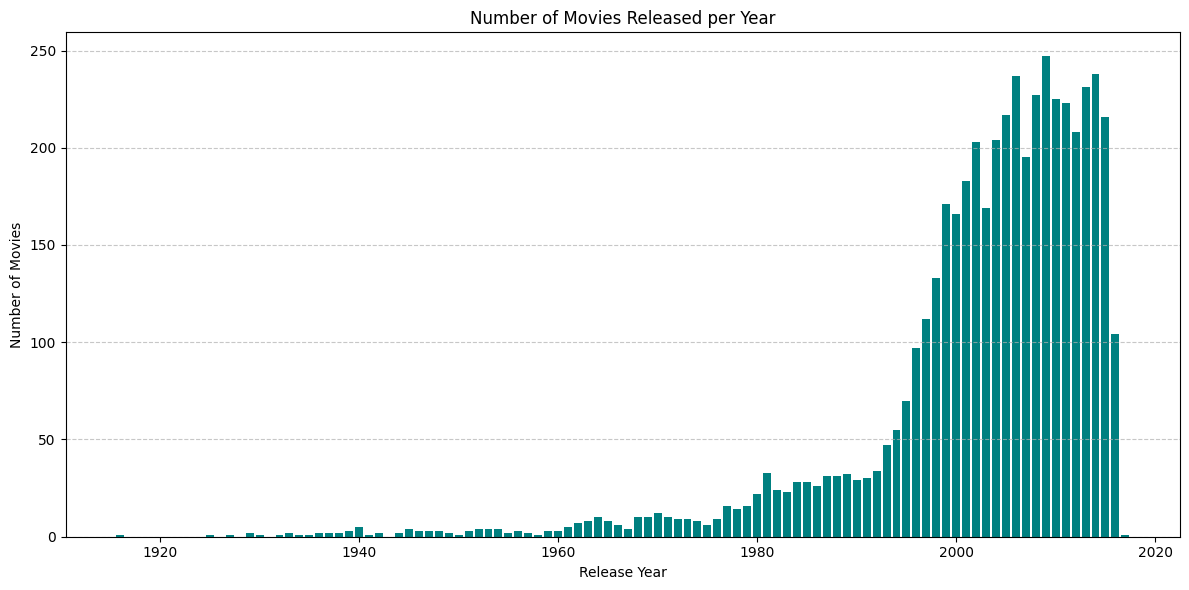

The year with the highest number of movie releases is 2009.0, with 247 movies.


In [104]:
# Convert release_date to datetime
movie_data1['release_date'] = pd.to_datetime(movie_data1['release_date'], errors='coerce')

# Extract release year
movie_data1['release_year'] = movie_data1['release_date'].dt.year

# Count number of movies per year
movies_per_year = movie_data1['release_year'].value_counts().sort_index()



# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar(movies_per_year.index.astype(int), movies_per_year.values, color='teal')
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released per Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# to print year and No of movies
pmovies_per_year = movie_data1['release_year'].value_counts().sort_index()

# Find the year with the most movies
most_common_year = movies_per_year.idxmax()
most_common_year_count = movies_per_year.max()

# طباعة النتيجة
print(f"The year with the highest number of movie releases is {most_common_year}, with {most_common_year_count} movies.")

### Find the top 2 countries with the highest production movies number ###

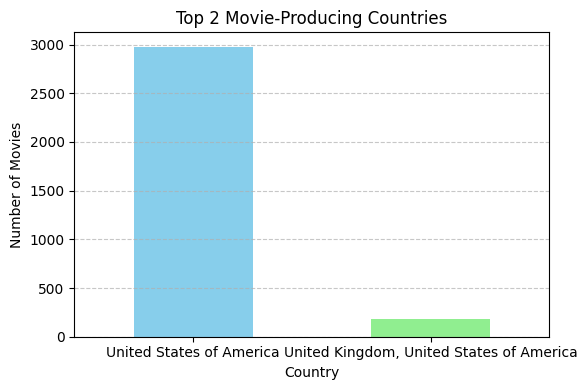

In [9]:
# Flatten the list and count occurrences
all_countries = movie_data1['production_countries_names'].explode()
top_2_countries = all_countries.value_counts().head(2)

# Plot the top 2 countries
plt.figure(figsize=(6, 4))
top_2_countries.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Top 2 Movie-Producing Countries")
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Find the top 1 company with the highest production movies number ###



### Is there any relation between the runtime and average vote value ### **


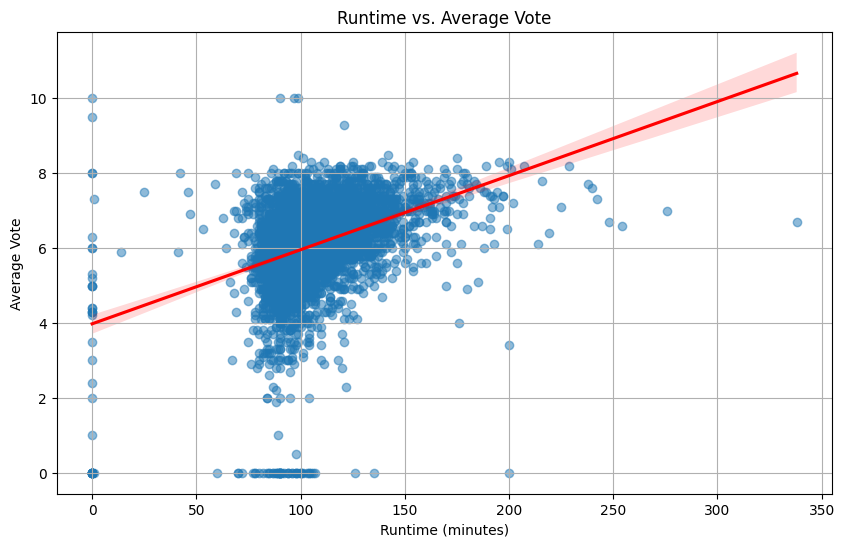

Correlation between runtime and average vote: 0.38


In [25]:
# Drop rows with missing values in relevant columns
runtime_vote_df = movie_data1.dropna(subset=['runtime', 'vote_average'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=runtime_vote_df, x='runtime', y='vote_average', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Runtime vs. Average Vote')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Vote')
plt.grid(True)
plt.show()

# Correlation coefficient
correlation = runtime_vote_df['runtime'].corr(runtime_vote_df['vote_average'])
print(f"Correlation between runtime and average vote: {correlation:.2f}")


### Find the top 5 movies with the highest rate, and find if there anything common between them. ###



In [115]:
# Sort movies by highest rating 
top_5_rated = movie_data1.sort_values(by='vote_average', ascending=False).head(5)

#data presentation
print(top_5_rated[['title', 'vote_average', 'genres_names', 'production_companies_names', 'release_date']])

                      title  vote_average            genres_names  \
3519       Stiff Upper Lips          10.0                  Comedy   
4045  Dancer, Texas Pop. 81          10.0   Comedy, Drama, Family   
4662         Little Big Top          10.0                  Comedy   
4247  Me You and Five Bucks          10.0  Romance, Comedy, Drama   
3992              Sardaarji           9.5                 Missing   

        production_companies_names release_date  
3519                       Missing   1998-06-12  
4045  HSX Films, Chase Productions   1998-05-01  
4662                Fly High Films   2006-01-01  
4247                       Missing   2015-07-07  
3992                       Missing   2015-06-26  


### Find the most unsuccessful movie along time in terms of revenue - budget ###



In [116]:
# add new cloumn between revenue - budget
movie_data1['profit'] = movie_data1['revenue'] - movie_data1['budget']

# rearange data according to column 
movie_data1 = movie_data1.sort_values(by='profit', ascending=True)

movie_data1.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,genres_names,keywords_names,production_companies_names,production_countries_names,spoken_languages_names,profit
13,255000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Never Take Off the Mask,The Lone Ranger,5.9,2311,"Action, Adventure, Western","texas, horse, survivor, texas ranger, partner,...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English,-165710090.0


### Rearange the dataframe based on vote_average column values ###



In [117]:
# rearange data according to column 
movie_data1 = movie_data1.sort_values(by='vote_average', ascending=False)

movie_data1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,genres_names,keywords_names,production_companies_names,production_countries_names,spoken_languages_names,profit
4247,1.000000e+00,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",Missing,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,"A story about second, second chances",Me You and Five Bucks,10.0,2,"Romance, Comedy, Drama",Missing,Missing,Missing,Missing,-1.000000e+00
3519,3.704284e+07,"[{""id"": 35, ""name"": ""Comedy""}]",Missing,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,Missing,Stiff Upper Lips,10.0,1,Comedy,"italy, victorian england, young woman",Missing,"United Kingdom, India",English,-3.704284e+07
4662,3.704284e+07,"[{""id"": 35, ""name"": ""Comedy""}]",Missing,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,Missing,Little Big Top,10.0,1,Comedy,independent film,Fly High Films,United States of America,English,-3.704284e+07
4045,3.704284e+07,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",Missing,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"Comedy, Drama, Family","small town, texas","HSX Films, Chase Productions",United States of America,English,-3.647725e+07
3992,3.704284e+07,[],Missing,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],...,Missing,Sardaarji,9.5,2,Missing,Missing,Missing,India,Missing,-3.704284e+07


### Rearange the dataframe based on runtime column values ###



In [118]:
# rearange data according to column 
movie_data1 = movie_data1.sort_values(by='runtime', ascending=False)

movie_data1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,genres_names,keywords_names,production_companies_names,production_countries_names,spoken_languages_names,profit
2384,1.800000e+07,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",Missing,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...",...,The man who hijacked the world,Carlos,6.7,50,"Crime, Drama, Thriller, History","gun, car bomb, miniseries, terrorism, opec, ho...","Egoli Tossell Film AG, Canal+, Arte France, Fi...","France, Germany","Français, Deutsch, English, Español, العربية, ...",-1.712872e+07
2631,3.704284e+07,"[{""id"": 18, ""name"": ""Drama""}]",Missing,112430,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Company,Real-life figures from the Cold War era mix wi...,1.485324,[],...,Missing,The Company,7.0,12,Drama,miniseries,Missing,Missing,Missing,-3.704284e+07
1922,3.704284e+07,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",Missing,10655,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 4097...",en,Gettysburg,Summer 1863. The Confederacy pushes north into...,5.529035,"[{""name"": ""TriStar Television"", ""id"": 8609}, {...",...,Missing,Gettysburg,6.6,90,"War, Drama, History","civil war, independence, troops, army, battle,...","TriStar Television, Esparza / Katz Productions",United States of America,English,-1.204284e+07
1125,3.111500e+07,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",Missing,8095,"[{""id"": 5049, ""name"": ""ancient rome""}, {""id"": ...",en,Cleopatra,Historical epic. The triumphs and tragedy of t...,13.244365,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,The motion picture the world has been waiting ...,Cleopatra,6.7,146,"Drama, History, Romance","ancient rome, historical figure, cleopatra, ju...","Twentieth Century Fox Film Corporation, MCL Fi...","United Kingdom, United States of America, Swit...","English, Português",3.988500e+07
2373,3.704284e+07,"[{""id"": 18, ""name"": ""Drama""}]",Missing,10549,"[{""id"": 456, ""name"": ""mother""}, {""id"": 497, ""n...",en,Hamlet,"Hamlet, Prince of Denmark, returns home to fin...",9.814785,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...",...,Missing,Hamlet,7.3,117,Drama,"mother, shakespeare, denmark, loss of father, ...","Castle Rock Entertainment, Turner Pictures (I)","United Kingdom, United States of America",English,-3.704284e+07


### Find the top 5 successful years for the USA cinema based on the total income devided by number of movies  ###



### Find the most succesfull movie in [USA, UK] ###



In [17]:
 # Filter for movies from USA or UK
filtered_movie_data1= movie_data1[movie_data1['production_countries_names'].isin(['United States of America', 'United Kingdom'])]

# Drop rows with missing revenue
filtered_movie_data1 = filtered_movie_data1.dropna(subset=['revenue'])

# Find the movie with the highest revenue
most_successful_movie = filtered_movie_data1.loc[filtered_movie_data1['revenue'].idxmax()]

# Display result
print("Most successful movie in United States of America or United Kingdom:")
print(f"Title: {most_successful_movie['title']}")
print(f"Country: {most_successful_movie['production_countries_names']}")
print(f"Revenue: ${most_successful_movie['revenue']:,}")


Most successful movie in United States of America or United Kingdom:
Title: Titanic
Country: United States of America
Revenue: $1,845,034,188


### In your opinion what is the highest variable that affects the revenue value (high coloration) ### PONUS



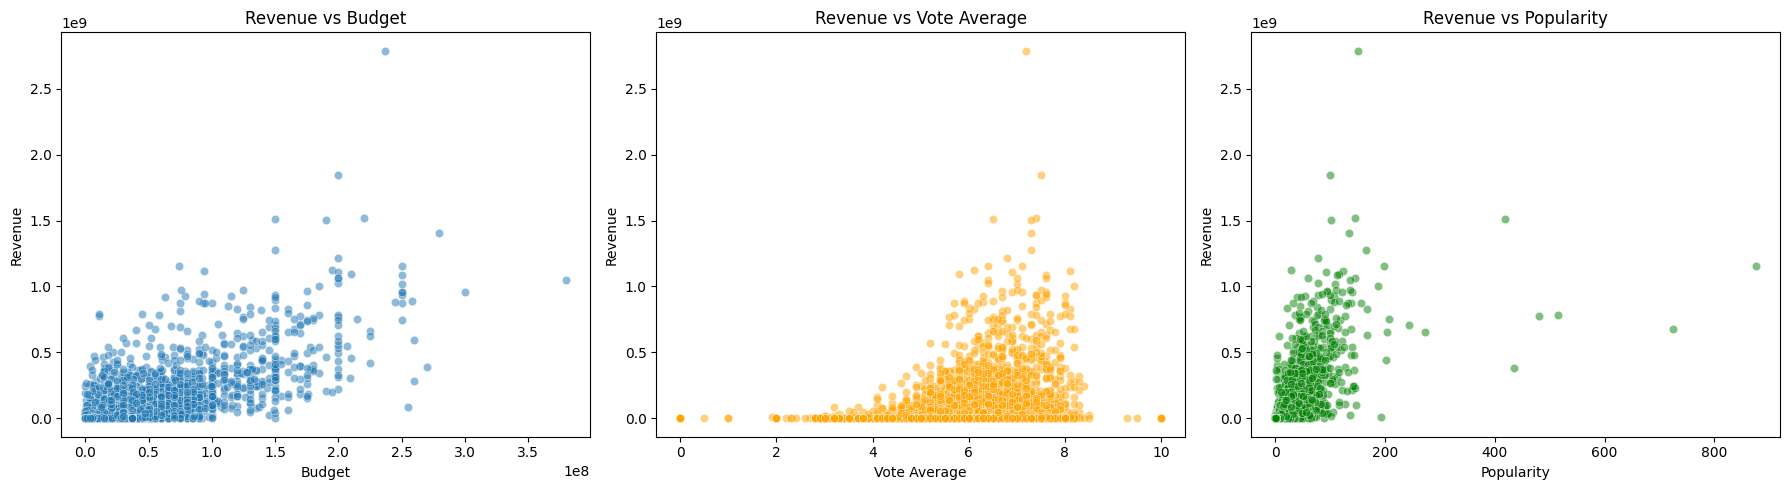

In [119]:

plt.figure(figsize=(18, 5))

# draw 1: revenue vs budget
plt.subplot(1, 3, 1)
sns.scatterplot(data=movie_data1, x='budget', y='revenue', alpha=0.5)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# draw 2: revenue vs vote_average
plt.subplot(1, 3, 2)
sns.scatterplot(data=movie_data1, x='vote_average', y='revenue', alpha=0.5, color='orange')
plt.title('Revenue vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')

# draw 3: revenue vs popularity
plt.subplot(1, 3, 3)
sns.scatterplot(data=movie_data1, x='popularity', y='revenue', alpha=0.5, color='green')
plt.title('Revenue vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

# عرض الرسومات
plt.tight_layout()
plt.show()

## Good Luck